[View in Colaboratory](https://colab.research.google.com/github/keicoon/GAN/blob/master/GAN.ipynb)

In [1]:
import numpy as np
import tensorflow as tf
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def generator(X):
  with tf.variable_scope('generator', reuse=False):
    G = tf.layers.dense(X, 256, activation=tf.nn.leaky_relu)
    G = tf.layers.dense(G, 28*28, activation=tf.nn.sigmoid)

  return G

def discriminator(X, reuse=False):
  with tf.variable_scope('discriminator', reuse=reuse):
    D = tf.layers.dense(X, 256, activation=tf.nn.leaky_relu)
    D = tf.layers.dense(D, 1, activation=tf.nn.sigmoid)

  return D

def GAN(X, Z):
  G = generator(Z)
  
  real = discriminator(X)
  gene = discriminator(G, reuse=True)

  return G, Z, real, gene
  
def loss(real, gene):
  loss_D = tf.reduce_mean(tf.log(real) + tf.log(1 - gene))
  loss_G = tf.reduce_mean(tf.log(gene))
  
  return -loss_D, -loss_G

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.reset_default_graph()

batch_size = 128
n_samples = int(mnist.train.num_examples)
total_batch = int(n_samples / batch_size)

X = tf.placeholder(tf.float32, [None, 28*28])
Z = tf.placeholder(tf.float32, [None, 128])

G, Z, real, gene = GAN(X, Z)
loss_D, loss_G = loss(real, gene)

disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='discriminator')
gene_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='generator')

train_op_D = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss_D, var_list=disc_vars)
train_op_G = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(loss_G, var_list=gene_vars)

sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

step: 1 loss_d: 0.205 loss_g: 3.597
step: 2 loss_d: 0.099 loss_g: 3.755
step: 3 loss_d: 0.064 loss_g: 4.295
step: 4 loss_d: 0.073 loss_g: 4.935
step: 5 loss_d: 0.063 loss_g: 5.567
step: 6 loss_d: 0.039 loss_g: 5.660
step: 7 loss_d: 0.050 loss_g: 4.748
step: 8 loss_d: 0.309 loss_g: 2.602
step: 9 loss_d: 0.180 loss_g: 3.482
step: 10 loss_d: 0.219 loss_g: 3.542
step: 11 loss_d: 0.267 loss_g: 3.270
Reconstructed Images


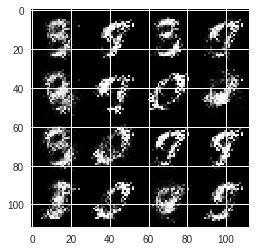

step: 12 loss_d: 0.247 loss_g: 3.293
step: 13 loss_d: 0.279 loss_g: 3.019
step: 14 loss_d: 0.274 loss_g: 2.893
step: 15 loss_d: 0.312 loss_g: 2.864
step: 16 loss_d: 0.323 loss_g: 2.950
step: 17 loss_d: 0.335 loss_g: 3.082
step: 18 loss_d: 0.338 loss_g: 3.066
step: 19 loss_d: 0.390 loss_g: 3.103
step: 20 loss_d: 0.355 loss_g: 3.036
step: 21 loss_d: 0.313 loss_g: 3.013
Reconstructed Images


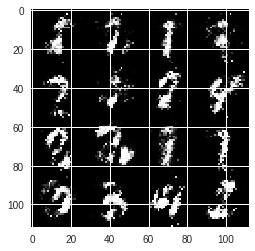

step: 22 loss_d: 0.316 loss_g: 3.008
step: 23 loss_d: 0.316 loss_g: 3.133
step: 24 loss_d: 0.363 loss_g: 3.087
step: 25 loss_d: 0.365 loss_g: 3.232
step: 26 loss_d: 0.357 loss_g: 3.206
step: 27 loss_d: 0.342 loss_g: 3.299
step: 28 loss_d: 0.336 loss_g: 3.329
step: 29 loss_d: 0.323 loss_g: 3.390
step: 30 loss_d: 0.298 loss_g: 3.515
step: 31 loss_d: 0.296 loss_g: 3.497
Reconstructed Images


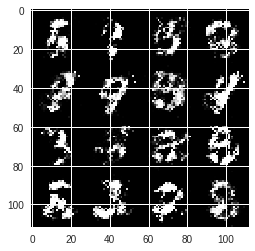

step: 32 loss_d: 0.311 loss_g: 3.420
step: 33 loss_d: 0.337 loss_g: 3.364
step: 34 loss_d: 0.348 loss_g: 3.444
step: 35 loss_d: 0.382 loss_g: 3.324
step: 36 loss_d: 0.369 loss_g: 3.434
step: 37 loss_d: 0.294 loss_g: 3.645
step: 38 loss_d: 0.342 loss_g: 3.343
step: 39 loss_d: 0.346 loss_g: 3.297
step: 40 loss_d: 0.359 loss_g: 3.283
step: 41 loss_d: 0.322 loss_g: 3.465
Reconstructed Images


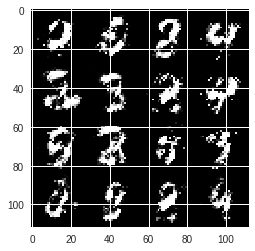

step: 42 loss_d: 0.337 loss_g: 3.380
step: 43 loss_d: 0.329 loss_g: 3.430
step: 44 loss_d: 0.343 loss_g: 3.424
step: 45 loss_d: 0.299 loss_g: 3.552
step: 46 loss_d: 0.307 loss_g: 3.465
step: 47 loss_d: 0.291 loss_g: 3.544
step: 48 loss_d: 0.277 loss_g: 3.664
step: 49 loss_d: 0.323 loss_g: 3.438
step: 50 loss_d: 0.331 loss_g: 3.479
step: 51 loss_d: 0.295 loss_g: 3.605
Reconstructed Images


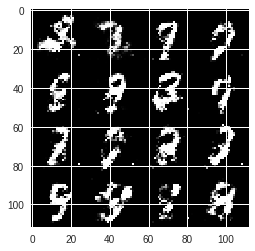

step: 52 loss_d: 0.317 loss_g: 3.450
step: 53 loss_d: 0.303 loss_g: 3.460
step: 54 loss_d: 0.291 loss_g: 3.492
step: 55 loss_d: 0.296 loss_g: 3.516
step: 56 loss_d: 0.319 loss_g: 3.451
step: 57 loss_d: 0.327 loss_g: 3.372
step: 58 loss_d: 0.308 loss_g: 3.420
step: 59 loss_d: 0.307 loss_g: 3.385
step: 60 loss_d: 0.309 loss_g: 3.396
step: 61 loss_d: 0.324 loss_g: 3.377
Reconstructed Images


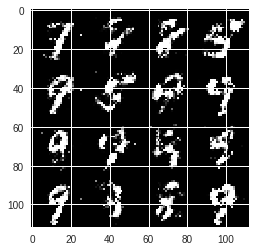

step: 62 loss_d: 0.336 loss_g: 3.350
step: 63 loss_d: 0.341 loss_g: 3.325
step: 64 loss_d: 0.353 loss_g: 3.261
step: 65 loss_d: 0.354 loss_g: 3.227
step: 66 loss_d: 0.358 loss_g: 3.193
step: 67 loss_d: 0.356 loss_g: 3.171
step: 68 loss_d: 0.366 loss_g: 3.150
step: 69 loss_d: 0.366 loss_g: 3.167
step: 70 loss_d: 0.358 loss_g: 3.175
step: 71 loss_d: 0.370 loss_g: 3.160
Reconstructed Images


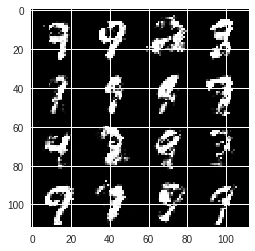

step: 72 loss_d: 0.386 loss_g: 3.108
step: 73 loss_d: 0.382 loss_g: 3.072
step: 74 loss_d: 0.372 loss_g: 3.094
step: 75 loss_d: 0.369 loss_g: 3.109
step: 76 loss_d: 0.383 loss_g: 3.052
step: 77 loss_d: 0.396 loss_g: 3.046
step: 78 loss_d: 0.400 loss_g: 3.000
step: 79 loss_d: 0.402 loss_g: 2.970
step: 80 loss_d: 0.416 loss_g: 2.951
step: 81 loss_d: 0.426 loss_g: 2.914
Reconstructed Images


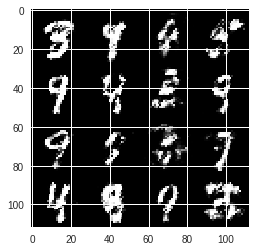

step: 82 loss_d: 0.432 loss_g: 2.961
step: 83 loss_d: 0.436 loss_g: 2.949
step: 84 loss_d: 0.427 loss_g: 2.923
step: 85 loss_d: 0.436 loss_g: 2.881
step: 86 loss_d: 0.440 loss_g: 2.838
step: 87 loss_d: 0.466 loss_g: 2.786
step: 88 loss_d: 0.467 loss_g: 2.780
step: 89 loss_d: 0.461 loss_g: 2.776
step: 90 loss_d: 0.474 loss_g: 2.748
step: 91 loss_d: 0.493 loss_g: 2.715
Reconstructed Images


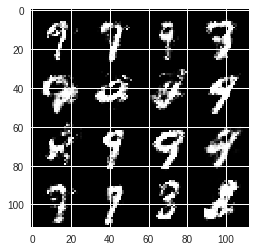

step: 92 loss_d: 0.489 loss_g: 2.725
step: 93 loss_d: 0.519 loss_g: 2.679
step: 94 loss_d: 0.500 loss_g: 2.673
step: 95 loss_d: 0.506 loss_g: 2.677
step: 96 loss_d: 0.517 loss_g: 2.643
step: 97 loss_d: 0.531 loss_g: 2.603
step: 98 loss_d: 0.542 loss_g: 2.565
step: 99 loss_d: 0.528 loss_g: 2.589
step: 100 loss_d: 0.526 loss_g: 2.578


In [36]:
def train():
  training_epochs = 100
  
  for epoch in range(training_epochs):
    sum_loss_d = 0.
    sum_loss_g = 0.
    
    for i in range(total_batch):
      batch_x, _ = mnist.train.next_batch(batch_size, shuffle=True)
      noise = np.random.normal(size=(batch_size, 128))
      
      _, loss_d = sess.run([train_op_D, loss_D], feed_dict={X: batch_x, Z: noise})
      _, loss_g = sess.run([train_op_G, loss_G], feed_dict={Z: noise})
      
      sum_loss_d += loss_d
      sum_loss_g += loss_g
    # test
    print('step: {} loss_d: {:>3.3f} loss_g: {:>3.3f}'.format(epoch + 1, sum_loss_d/total_batch, sum_loss_g/total_batch))
    if epoch % 10 == 0 and epoch > 0:
      test()
train()

In [0]:
def test():
    n = 4
    
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        noise = np.random.normal(size=(n, 128))
        
        recon = sess.run(G, feed_dict={Z: noise})

        # Display reconstructed images
        for j in range(n):
            # Draw the generated digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = recon[j].reshape([28, 28])

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()